In [61]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
df = pd.read_csv("C. Train_Test_Data.csv" , index_col=0)

## Seperate Features and Labels

In [63]:
X = df.drop("Exited" , axis=1)
Y = df["Exited"]

##  Try Different Models

In [64]:
# train the model and calculate metrics (n times)
n = 5_000
Result_Dict = dict()
for i in range(1 , n+1):
    RanState = i
    # seperating train and test data
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X , Y, test_size = 0.25 , random_state = RanState)
    # train the model
    Regressor = LogisticRegression()
    Regressor.fit(X_Train , Y_Train)
    # predict
    Y_Predicted = Regressor.predict(X_Test)
    # loss functions and metrics
    AccScore = accuracy_score(Y_Test , Y_Predicted)
    Result_Dict[RanState] = AccScore

## Choose the Best Model

In [65]:
# presenting the result
Result = (pd.Series(Result_Dict).to_frame().rename(columns={0:"Accuracy(%)"}) *100).round(2)
Result.index.name = "RS"

In [66]:
Result.sort_values(by="Accuracy(%)" , ascending=False).head(5)

,Accuracy(%)
RS,
2280,85.15
1405,84.95
1654,84.65
1741,84.55
3724,84.50


In [78]:
Best_RS = Result.idxmax().values[0]
Best_Score = Result.loc[Best_RS].values[0]
print(f"The ideal random state is \"{Best_RS}\",")
print(f"and the corresponding score is \"{Best_Score} percent\"." , end="")

The ideal random state is "2280",
and the corresponding score is "85.15 percent".

## Some Visualization, for Fun

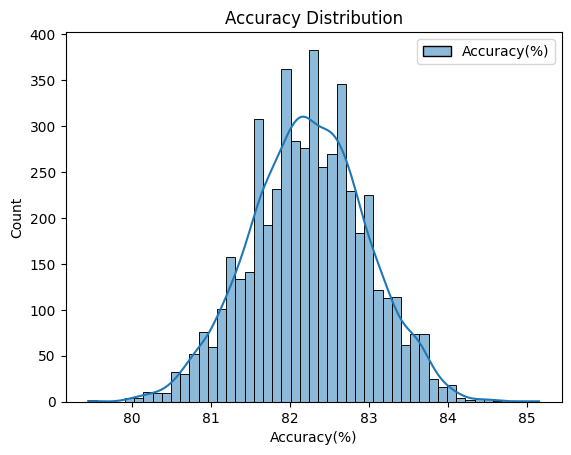

In [82]:
from seaborn import histplot
from matplotlib.pyplot import show , subplots

fig , ax = subplots(nrows=1 , ncols=1)
ax = histplot(Result , kde=True)
ax.set_title("Accuracy Distribution")
ax.set_xlabel("Accuracy(%)")

show()
del histplot , show , subplots

## Train the Final Model

In [68]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X , Y, test_size = 0.25 , random_state = Best_RS)
Regressor = LogisticRegression()
Regressor.fit(X_Train , Y_Train)

LogisticRegression()

## Save the Model

In [81]:
from pickle import dump
import pickle
with open('Model.pkl', 'wb+') as f:
    dump(Regressor, f)
del dump